In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
sns.set(style="whitegrid")

In [36]:
df = pd.read_csv("telco FE.csv")

## Univariate Analysis

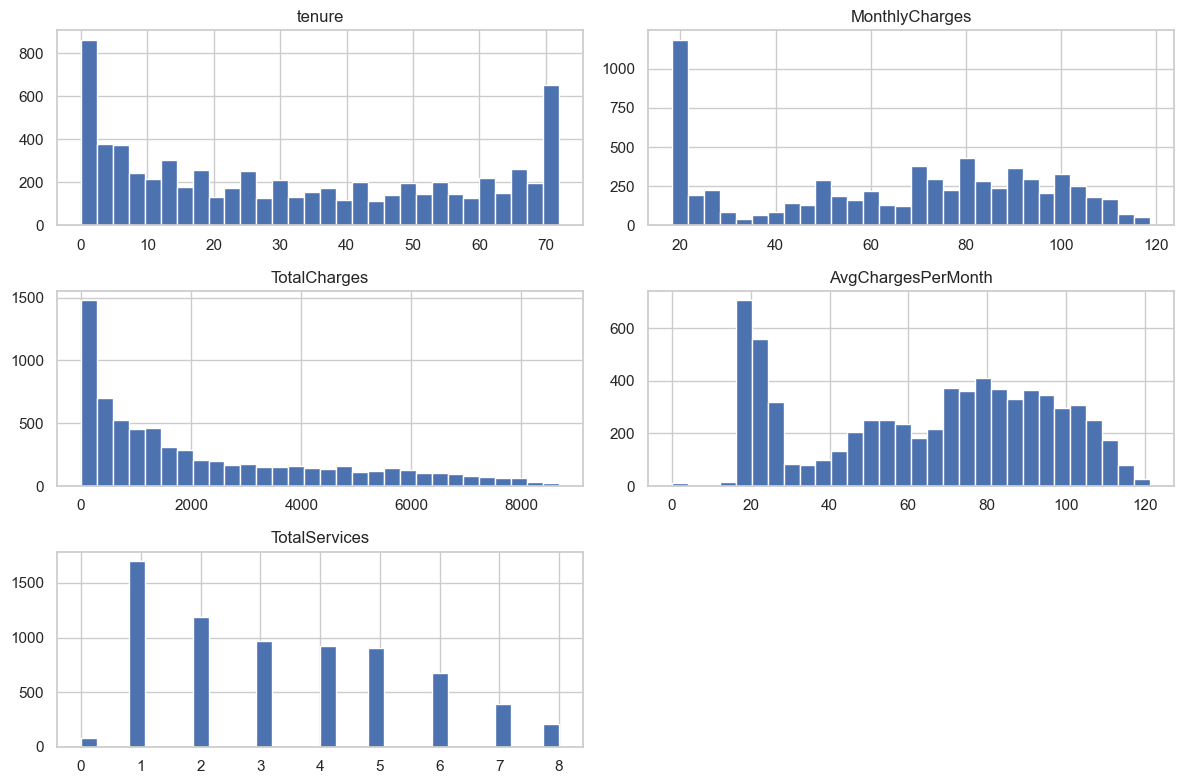

In [26]:
numeric_cols = ['tenure','MonthlyCharges','TotalCharges','AvgChargesPerMonth','TotalServices']
df[numeric_cols].hist(bins=30, figsize=(12,8))
plt.tight_layout()
plt.savefig("reports/Univariate Analysis.png", dpi=300, bbox_inches='tight')
plt.show()


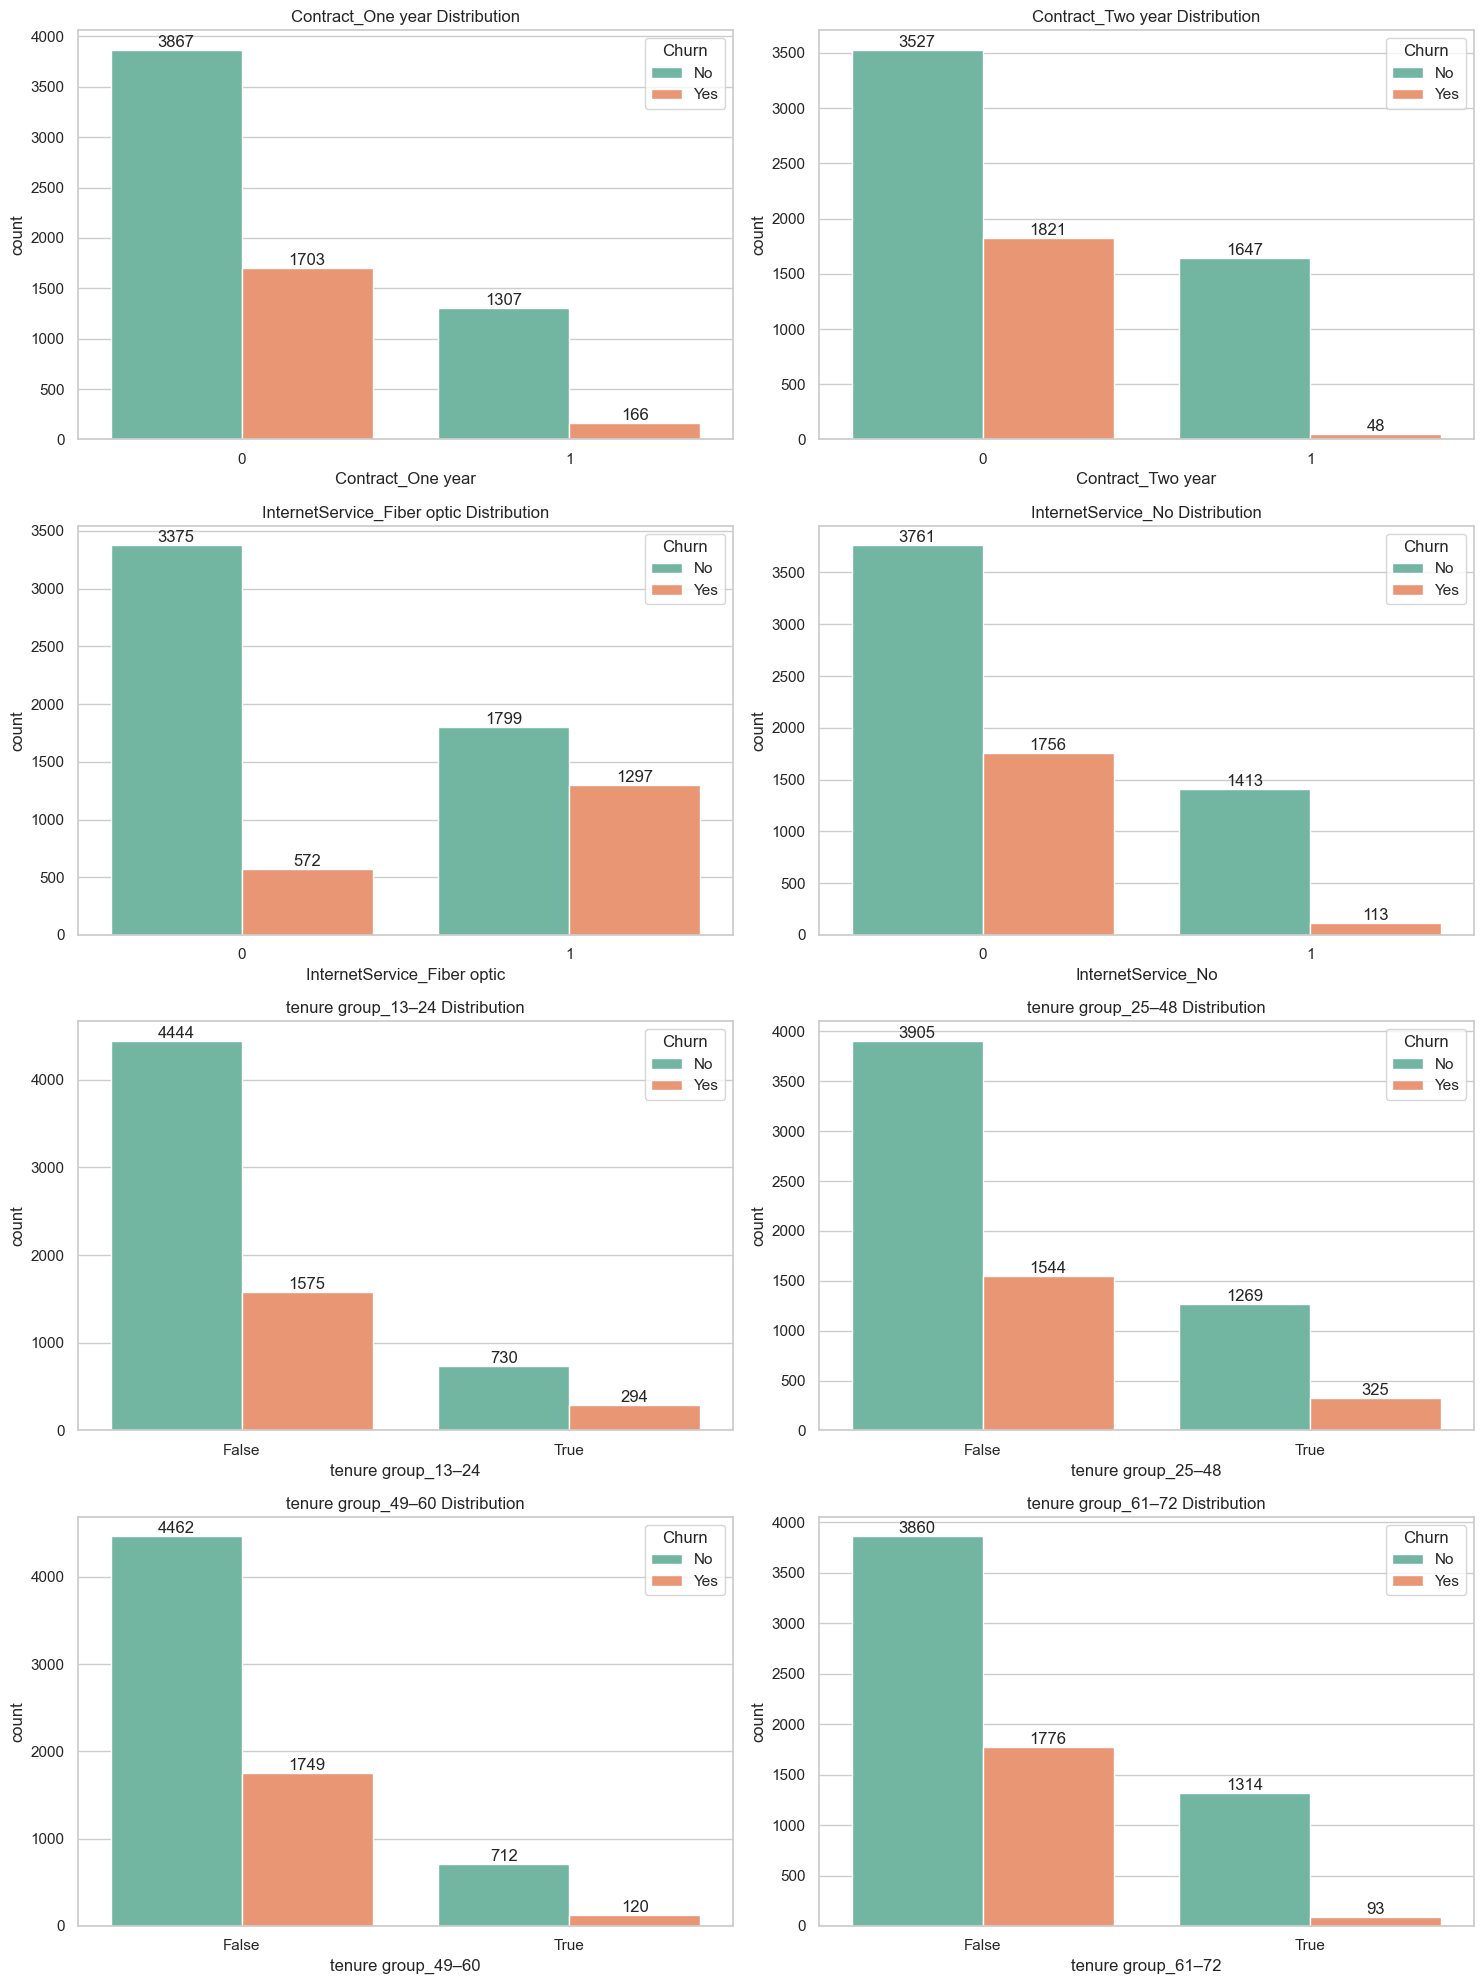

In [27]:
categorical_cols = ["Contract_One year","Contract_Two year", "InternetService_Fiber optic","InternetService_No",
            "tenure group_13–24","tenure group_25–48","tenure group_49–60","tenure group_61–72"]


fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,20))  
axes = axes.flatten()   

for i, col in enumerate(categorical_cols):
    ax = axes[i]
    sns.countplot(data=df, x=col, hue='Churn',palette="Set2",ax=ax)
    ax.set_title(f'{col} Distribution')

    
    for container in ax.containers:
        ax.bar_label(container)

plt.tight_layout()
plt.savefig("reports/Univariate Analysis Categorical_cols.png", dpi=300, bbox_inches='tight')
plt.show()


## Bivariate Analysis

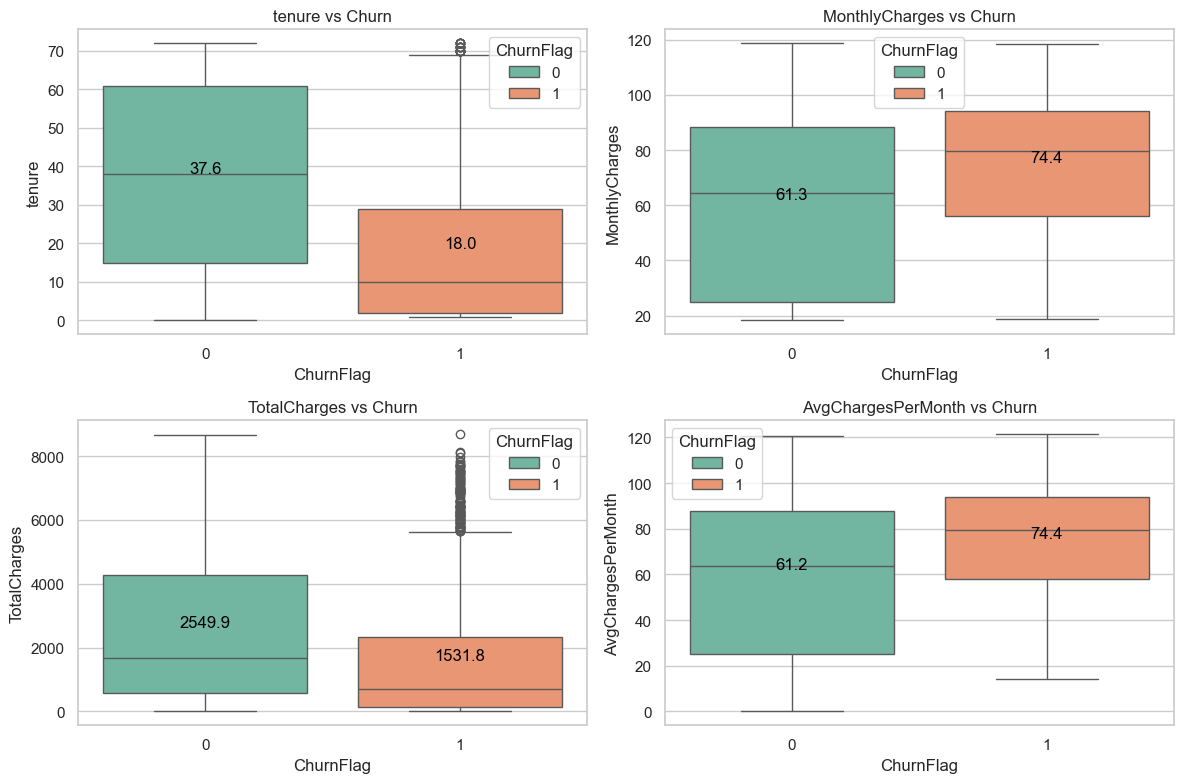

In [28]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgChargesPerMonth']


fig, axes = plt.subplots(nrows=(len(numeric_cols)+1)//2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    ax = axes[i]
    sns.boxplot(data=df, x='ChurnFlag',hue='ChurnFlag',y=col, palette="Set2", ax=ax)  
    ax.set_title(f'{col} vs Churn')

    means = df.groupby('ChurnFlag')[col].mean()
    for j, mean in enumerate(means):
        ax.text(j, mean, f'{mean:.1f}', ha='center', va='bottom', color='black')

plt.tight_layout()
plt.savefig("reports/Bivariate Analysis Numeric_cols.png", dpi=300, bbox_inches='tight')
plt.show()


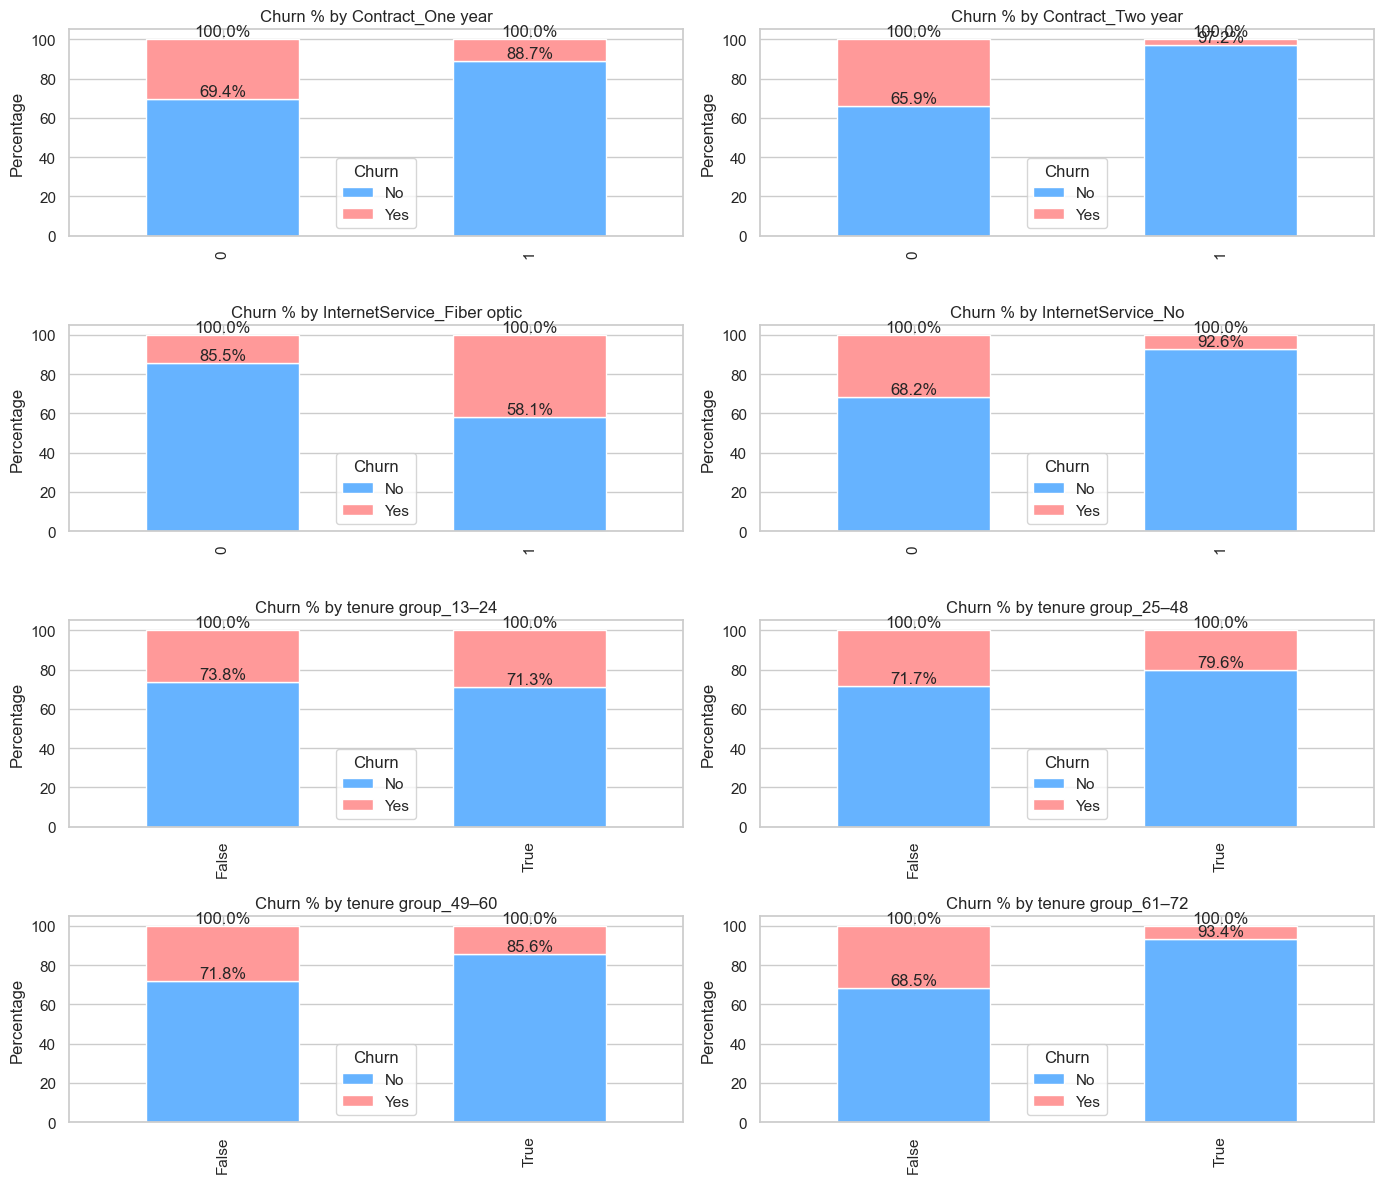

In [29]:
colors = ["#66b3ff", "#ff9999"]  

n = len(categorical_cols)
fig, axes = plt.subplots(nrows=(n+1)//2, ncols=2, figsize=(14, 3*((n+1)//2)))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ax = axes[i]
    
    churn_rate = pd.crosstab(df[col], df['ChurnFlag'], normalize='index') * 100
    churn_rate.plot(kind='bar', stacked=True, color=colors, ax=ax)
    
    ax.set_title(f'Churn % by {col}')
    ax.set_ylabel('Percentage')
    ax.set_xlabel('')
    ax.legend(title="Churn", labels=["No", "Yes"])
    
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%')

plt.tight_layout()
plt.savefig("reports/Bivariate Analysis Categorical_cols.png", dpi=300, bbox_inches='tight')
plt.show()


## Correlation Heatmap

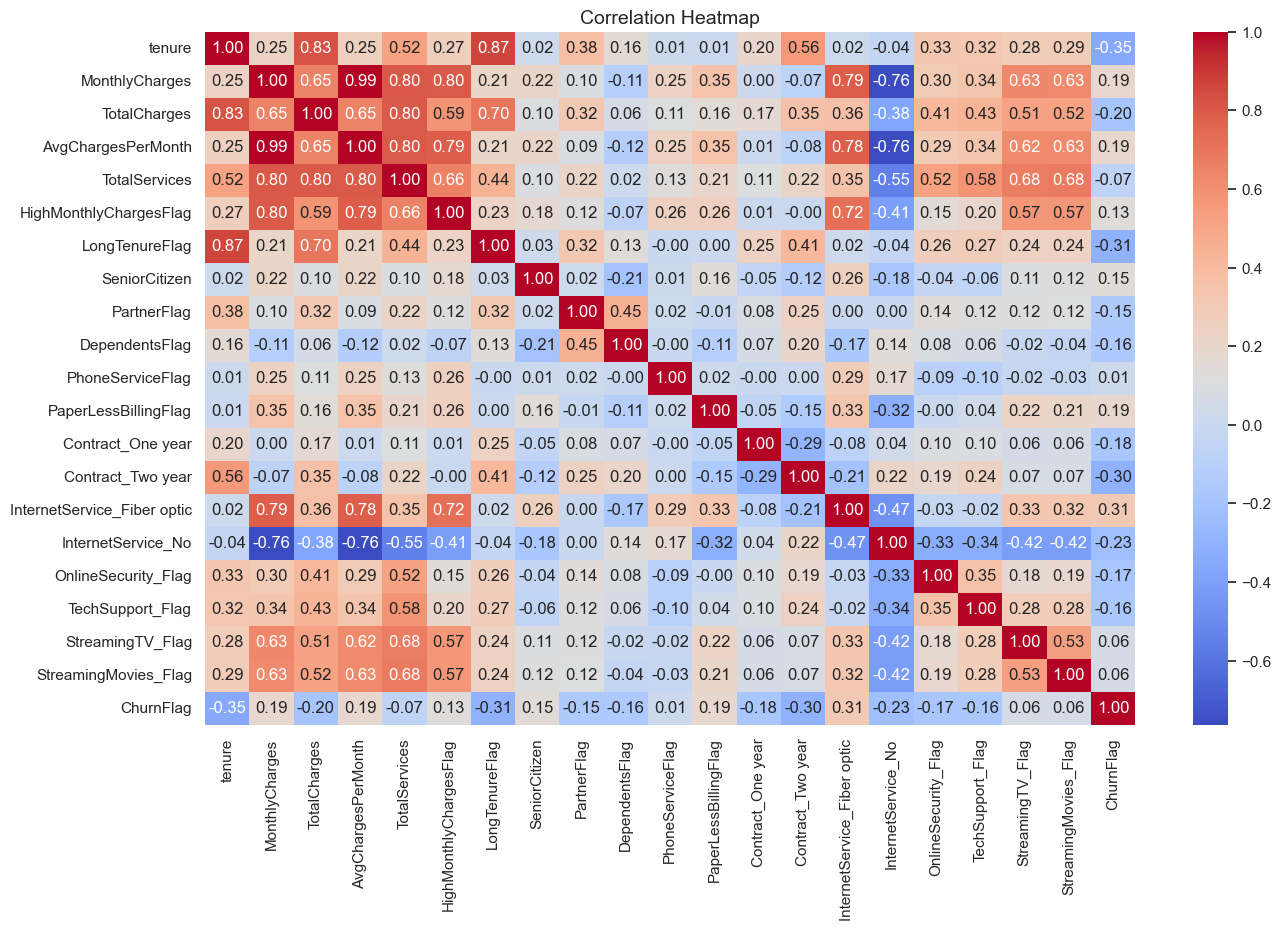

In [30]:
corr_cols = [
    'tenure', 'MonthlyCharges', 'TotalCharges', 'AvgChargesPerMonth',
    'TotalServices', 'HighMonthlyChargesFlag', 'LongTenureFlag',
    'SeniorCitizen', 'PartnerFlag', 'DependentsFlag',
    'PhoneServiceFlag', 'PaperLessBillingFlag',
    'Contract_One year', 'Contract_Two year',
    'InternetService_Fiber optic', 'InternetService_No',
    'OnlineSecurity_Flag', 'TechSupport_Flag',
    'StreamingTV_Flag', 'StreamingMovies_Flag',
    'ChurnFlag'
]
corr_df = df[corr_cols]
corr = corr_df.corr()

plt.figure(figsize=(15,9))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.savefig("reports/Correlation Heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

## Churn by Tenure Group

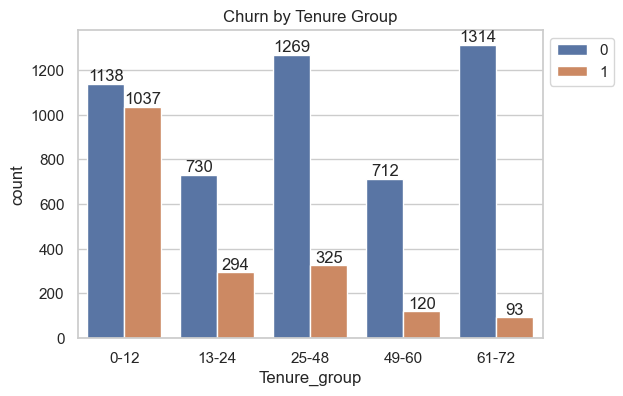

In [31]:
df['Tenure_group']= pd.cut(df['tenure'],bins=[0, 12, 24, 48, 60, 72], 
                           labels= ["0-12", "13-24", "25-48", "49-60", "61-72"])
  
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x='Tenure_group', hue='ChurnFlag')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title("Churn by Tenure Group")
for container in ax.containers:
    ax.bar_label(container)
    plt.savefig("reports/Churn by Tenure Group.png", dpi=300, bbox_inches='tight')
plt.show()

## Churn by Total Services

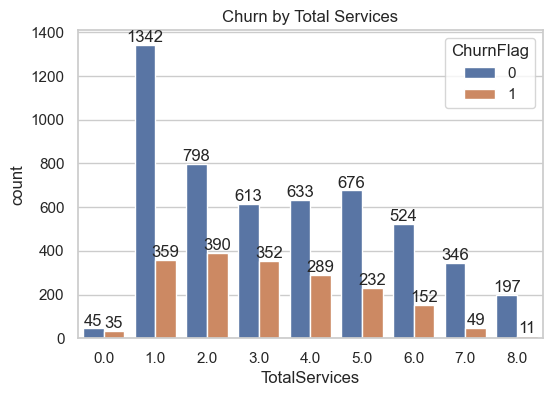

In [33]:
df['Total_services'] = df[['PhoneServiceFlag',
                          'MultipleLines_Flag',
                          'OnlineSecurity_Flag',
                          'OnlineBackup_Flag',
                          'DeviceProtection_Flag',
                          'TechSupport_Flag',
                          'StreamingTV_Flag',
                          'StreamingMovies_Flag']].sum(axis=1)
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x='TotalServices', hue='ChurnFlag')
plt.title("Churn by Total Services")
for container in ax.containers:
    ax.bar_label(container)
    plt.savefig("reports/Churn by Total Service.png", dpi=300, bbox_inches='tight')
plt.show()


## Churn by Contract Type

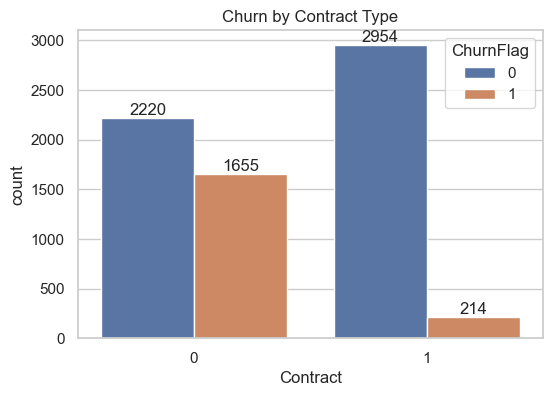

In [22]:
df['Contract']= df[["Contract_One year","Contract_Two year"]].sum(axis=1)
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x='Contract', hue='ChurnFlag')
plt.title("Churn by Contract Type")
for container in ax.containers:
    ax.bar_label(container)
    plt.savefig("reports/Churn by Contract Type.png", dpi=300, bbox_inches='tight')
plt.show()